In [ ]:
# explore data from "ETL_trinity_predictetoh_before_tap"
# Conny Lin | June 5, 2020

In [1]:
# local variables
pCapstone = '/Users/connylin/Dropbox/CA/ED _20200119 Brain Station Data Science Diploma/Capstone/data'
csvname = 'trinity_cleaned_N2_etoh_b4tap.csv'
pMWTDB = '/Users/connylin/Dropbox/MWT/db/MWTDB.csv'


In [17]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [3]:
# load data
pdata = os.path.join(pCapstone, csvname)
data = pd.read_csv(pdata, index_col=False)
data.drop(columns=['Unnamed: 0'], inplace=True)

<font color=red>Note: some wormid are NaN</font>

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11413375 entries, 0 to 11413374
Data columns (total 17 columns):
 #   Column      Dtype  
---  ------      -----  
 0   mwtid       int64  
 1   etoh        int64  
 2   time        float64
 3   speed       float64
 4   bias        float64
 5   tap         float64
 6   loc_x       float64
 7   loc_y       float64
 8   morphwidth  float64
 9   midline     float64
 10  area        float64
 11  angular     float64
 12  aspect      float64
 13  kink        float64
 14  curve       float64
 15  crab        float64
 16  wormid      float64
dtypes: float64(15), int64(2)
memory usage: 1.4 GB


In [12]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mwtid,11413375.0,509.262626,294.521838,17.00000,268.000000,440.000000,804.000000,975.0000
etoh,11413375.0,0.470422,0.499124,0.00000,0.000000,0.000000,1.000000,1.0000
time,11413375.0,39.638358,27.999562,1.00000,16.000000,34.000000,61.000000,99.9970
speed,11413375.0,0.790466,0.370111,0.00000,1.000000,1.000000,1.000000,6.6763
bias,11413375.0,0.192470,0.418165,-1.00000,0.000000,0.000000,0.000000,1.0000
tap,11413375.0,0.508230,0.613179,-1.00000,0.000000,1.000000,1.000000,1.0000
loc_x,11413375.0,5.400049,10.758301,0.00000,0.000000,0.000000,0.000000,46.2351
loc_y,11413375.0,25.859452,10.803280,0.28330,17.592600,26.022800,34.074100,58.9729
morphwidth,11413375.0,25.281532,17.009631,0.01330,12.669200,28.090800,38.691500,59.0447
midline,11413375.0,0.325710,0.377942,0.00960,0.103800,0.124200,0.233500,2.6365


<font color=green>Drop loc_x, loc_y, wormid</font>

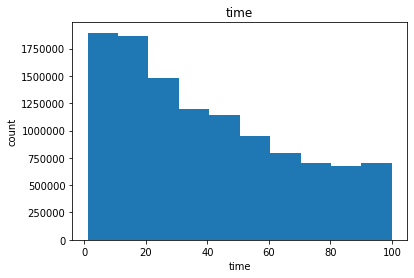

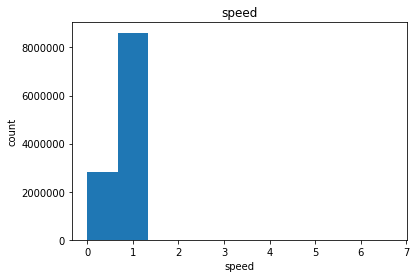

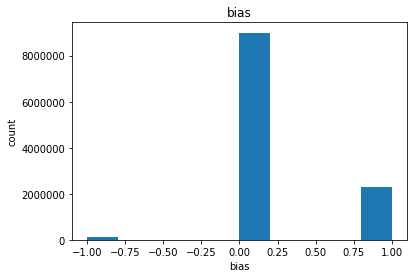

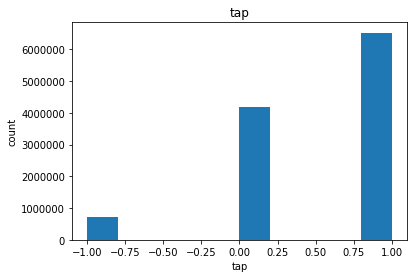

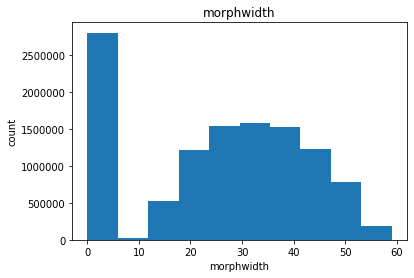

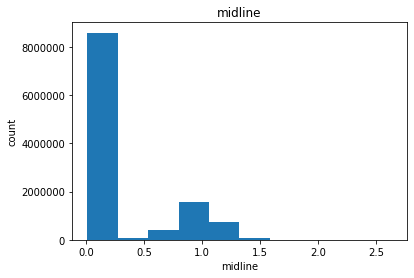

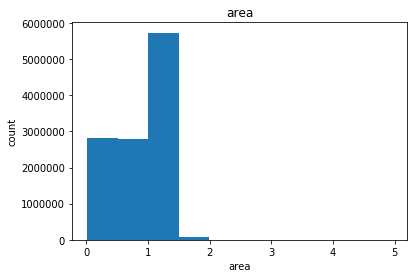

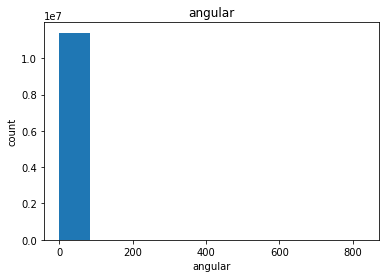

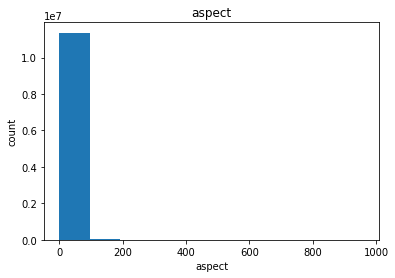

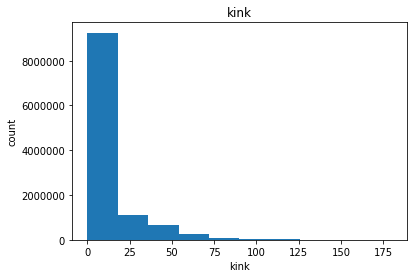

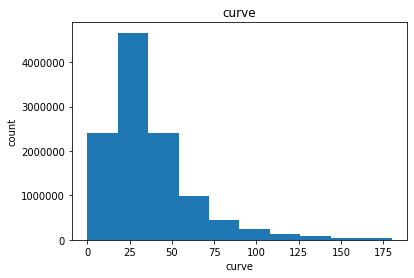

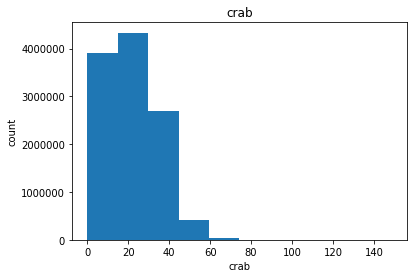

In [28]:
# plot distribution
columns_plot = ['time','speed','bias','tap','morphwidth','midline','area','angular','aspect',\
                'kink','curve','crab']
for c in columns_plot:
    plt.figure()
    plt.hist(data[c])
    plt.title(c)
    plt.ylabel('count')
    plt.xlabel(c)
    plt.show()
    

**Note (for historgram)**
* time : worm detect gradually lowers over time
* need fine tune graphs/data:
    * speed
    * morphwidth = 0?
    * midline = 0?
    * area = 0?
    * angular
    * aspect
    * kink - skewed right
    * curve - skewed right
    * crab - skewed right
* need to put aside (non-continuous)
    * bias
    * tap - remove worms that have taps
    * loc_x, loc_y, wormid

## look into 0 entries

* morphwidth = 0?
* midline = 0?
* area = 0?

### morphwidth

# of morphwidth=0: 0


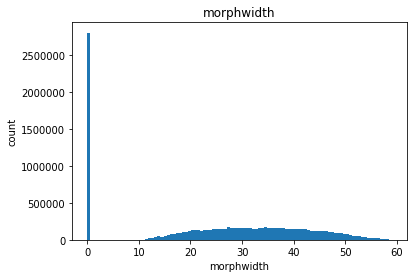

In [42]:
# check morphwidth = 0
cname = 'morphwidth'
n = sum(data[cname]==0)
print(f'# of {cname}=0: {n}')
plt.figure()
plt.hist(data['morphwidth'], bins=100)
plt.title(cname)
plt.ylabel('count')
plt.xlabel(cname)
plt.show()

In [47]:
cutoff = 10
n = sum(data[cname]<cutoff)
print(f'{n} {cname}<{cutoff}, {n/data.shape[0]*100:.2f}%')

2811696 morphwidth<10 24.64%


In [ ]:
# check midline
# check area

* need fine tune graphs/data:
    * angular
    * aspect
    * speed
    * kink - skewed right
    * curve - skewed right
    * crab - skewed right
* time : worm detect gradually lowers over time - Is there a difference between etoh vs no ethanol?


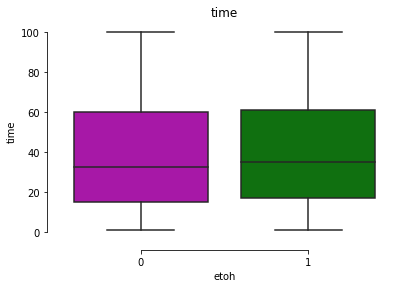

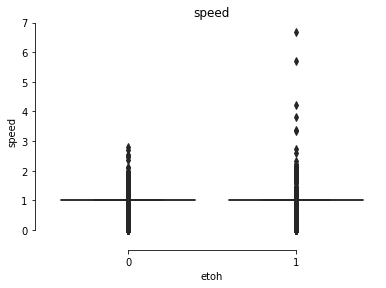

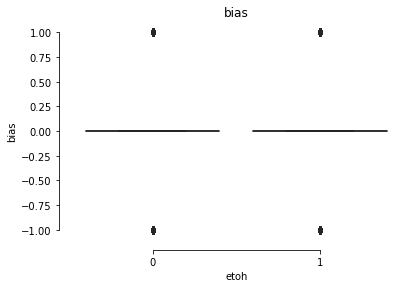

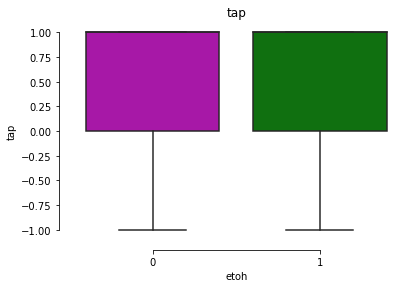

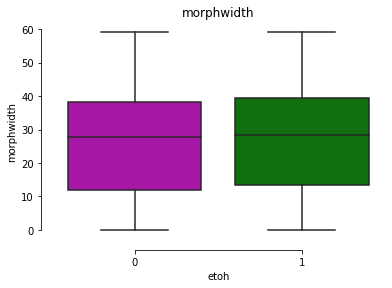

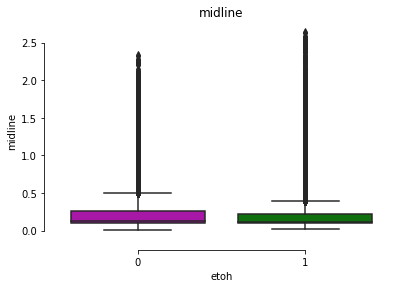

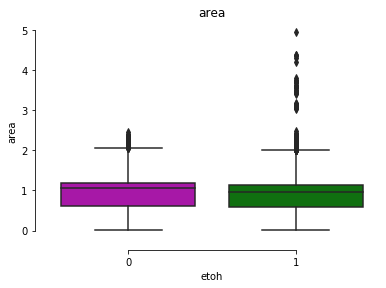

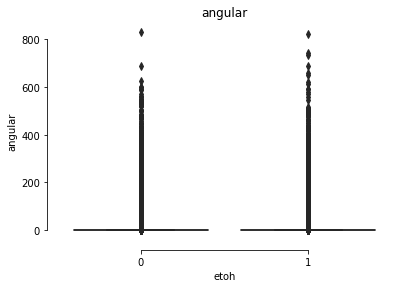

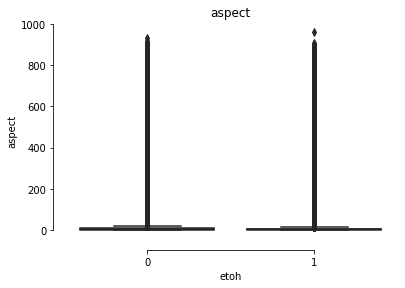

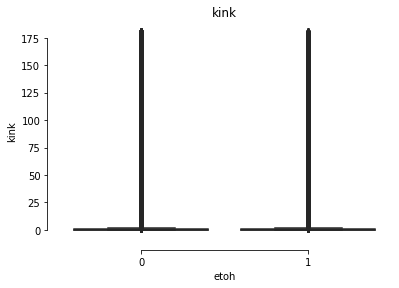

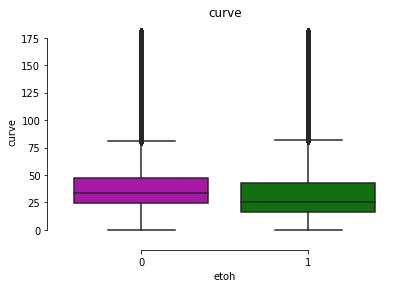

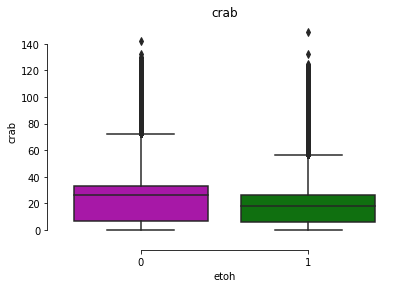

In [34]:
# compare etoh vs wt
for c in columns_plot:
    plt.figure()
    sns.boxplot(x="etoh", y=c, palette=["m", "g"],
                data=data)
    sns.despine(offset=10, trim=True)
    plt.title(c)

# separate predictors and outcomes

In [8]:
# remove data with tap time
# get unique mwtid that has tap before 100s
i = data['tap']==1
print(sum(i) / data.shape[0])


array([       0,        1,        2, ..., 11413371, 11413372, 11413373])

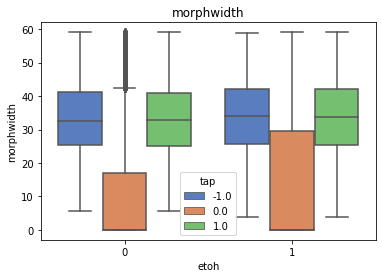

In [14]:
# see differences
plt.figure()
sns.boxplot(x="etoh", y="morphwidth", hue="tap", data=data, palette="muted")
plt.title('morphwidth')
plt.show()

In [15]:
data

,mwtid,etoh,time,speed,bias,tap,loc_x,loc_y,morphwidth,midline,area,angular,aspect,kink,curve,crab,wormid
0,17,1,1.0,1.0,0.0,1.0,0.0,16.2008,21.3477,0.1037,1.2937,0.164025,4.6,0.122,11.3,11.3,NaN
1,17,1,1.0,1.0,0.0,1.0,0.0,16.2237,21.3484,0.1041,1.2947,0.167670,4.0,0.124,7.9,11.4,NaN
2,17,1,1.0,1.0,0.0,1.0,0.0,16.2465,21.3505,0.1034,1.3011,0.166941,2.4,0.106,4.4,12.2,NaN
3,17,1,1.0,1.0,0.0,1.0,0.0,16.2667,21.3508,0.1038,1.2984,0.165483,1.5,0.106,8.2,14.2,NaN
4,17,1,1.0,1.0,0.0,1.0,0.0,16.2869,21.3517,0.1029,1.3325,0.164754,1.1,0.106,12.5,14.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11413370,975,0,98.0,1.0,0.0,1.0,0.0,29.4001,48.7551,0.0932,0.4305,0.054675,2.4,0.260,19.5,8.2,NaN
11413371,975,0,98.0,1.0,0.0,1.0,0.0,29.4002,48.7621,0.0917,0.4401,0.051759,1.2,0.135,4.7,3.8,NaN
11413372,975,0,98.0,1.0,0.0,1.0,0.0,29.3963,48.7737,0.0866,0.4179,0.046656,5.9,0.164,19.0,7.1,NaN
11413373,975,0,98.0,1.0,0.0,1.0,0.0,29.3928,48.7798,0.0890,0.3925,0.045927,8.7,0.206,7.4,2.8,NaN


In [19]:
pickle.load(open(os.path.join(pCapstone, 'legend_trinity_worm.pickle'),'rb'))

,call,name
0,t,time
1,n,number
2,N,goodnumber
3,s,speed
4,s,speed_std
5,b,bias
6,1,tap
7,2,puff
8,x,loc_x
9,y,loc_y


In [ ]:
* need to put aside (non-continuous)
    * bias
    * loc_x, loc_y, wormid

In [49]:
# put aside these
column_stashaway = ['bias','tap','loc_x','loc_y','wormid', 'mwtid']
data_others = data[column_stashaway].copy()
data.drop(columns=column_stashaway, inplace=True)

In [51]:
column_y = ['etoh']
y_df = data[column_y].copy()
data.drop(columns=column_y, inplace=True)

# use machine learning to see feature selection

In [53]:
from sklearn.feature_selection import VarianceThreshold
# Instantiate the VarianceThresholder 
my_vt = VarianceThreshold(threshold=10)
# Fit to the data and calculate the variances per column
my_vt.fit(data)
# Extract the variances per column
column_variances = my_vt.variances_.round(2)

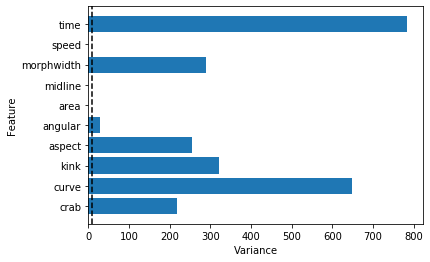

In [54]:
# Plot with the threshold
plt.figure()
plt.barh(np.flip(data.columns), np.flip(column_variances))
plt.xlabel('Variance')
plt.ylabel('Feature')
plt.axvline(10, color='black', linestyle='--')
plt.show()